<a href="https://colab.research.google.com/github/inesesteve/Valores-contrafactuales/blob/main/1_Instancias_contrafactuales_2_Metodo_explicaci%C3%B3n_contrastada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TAREA F4: VALORES CONTRAFACTUALES**
## Autoras: **Inés Esteve Mompó** y **Andrea Romero Medina**

## Enunciado del proyecto/tarea:
Los contrafactuales son interesantes para aprovechar el conocimiento recogido en un modelo de aprendizaje máquina.

● Introduce el concepto de contrafactuales y posibles métodos para obtenerlos.

● La librería `Alibi Explain` tiene implementados varios métodos. Muestra varios algoritmos para su cálculo y ejemplos de aplicación.



## Introducción teórica y motivación

En el campo del aprendizaje automático y la inteligencia artificial, comprender el razonamiento detrás de las decisiones de un modelo es fundamental para su aplicación efectiva y segura en diversas áreas. Las explicaciones contrafactuales han surgido como una herramienta poderosa para abordar esta necesidad al proporcionar insights sobre cómo y por qué un modelo toma ciertas decisiones. Sin embargo, antes de adentrarnos en la comprensión de los **contrafactuales**, es crucial entender el concepto más amplio de las explicaciones contrafactuales y su importancia.

Las **explicaciones contrafactuales** se centran en responder a la pregunta: "¿Por qué el modelo hizo esta predicción?". Estas explicaciones exploran cómo una instancia de entrada específica podría haber sido modificada mínimamente para que el modelo emitiera una predicción diferente. Proporcionan una comprensión detallada y transparente del proceso de toma de decisiones del modelo, lo que es esencial para la confianza y la interpretación de los resultados del modelo en entornos del mundo real.

Por lo tanto, antes de profundizar en los contrafactuales, es necesario establecer una base sólida sobre las explicaciones contrafactuales y su relevancia en el ámbito del aprendizaje automático. Esta introducción proporcionará el contexto necesario para comprender cómo los contrafactuales se utilizan como parte integral de las explicaciones contrafactuales para mejorar nuestra comprensión de los modelos de aprendizaje automático y sus decisiones.

### Explicación contrafactual

Una **explicación contrafactual para una predicción**, tal y como hemos comentado anteriormente, resalta el cambio más pequeño en los valores de las características que cambia la predicción a una salida predefinida.

Una definición formal de esta vendría dada por:

**Definición.** Dado un clasificador $b$ que produce la decisión $y=b(x)$ para una instancia $x$, una **explicación contrafactual** consiste en una instancia $x'$ tal que la decisión para $b$ en $x'$ es diferente de $y$, es decir, $y\neq b(x')$, y tal que la diferencia entre $x$ y $x'$ es mínima.

El clasificador $b$ es típicamente una caja negra, es decir, un modelo de aprendizaje automático no interpretable como una red neuronal, un conjunto, etc. Las diferencias no nulas entre $x$ y un contrafactual $x'$ revelan exactamente qué debería haber sido diferente en $x$ para tener un resultado diferente. Por lo tanto, un contrafactual describe la dependencia de los hechos externos que condujeron a una decisión particular realizada por la caja negra, centrándose en las diferencias en el comportamiento que el usuario final debe hacer para obtener la predicción opuesta con respecto a $b(x) = y$.

A continuación, formalizamos las propiedades más ampliamente utilizadas y compartidas que deben garantizar las explicaciones contrafactuales:

- **Validez**: Un contrafactual $x'$ es válido si realmente cambia el resultado de clasificación con respecto al original, es decir, $b(x') \neq b(x)$.

- **Minimalidad (Sparsity)**: No debe haber otro ejemplo contrafactual válido $x''$ tal que el número de pares de valores de atributos diferentes entre $x$ y $x'$ sea mayor que el número de pares de valores de atributos diferentes entre $x$ y $x''$. Decimos que $x'$ es minimal si y solo si no hay $x''$ tal que $|\delta_{x,x''}| < |\delta_{x,x'}|$, donde $x'$ es un ejemplo contrafactual, $\delta_{x, x'}$ la explicación contrafactual. En esencia, un contrafactual mínimo presenta los cambios más pequeños posibles para alterar la predicción.

- **Similitud**: Un contrafactual $x'$ debe ser similar a $x$, es decir, dada una función de distancia $d$ en el dominio de $x$, la distancia entre $x$ y $x'$ debe ser lo más pequeña posible, $d(x, x') < \varepsilon$, donde $\varepsilon$ es un umbral de distancia máximo predefinido. Esto significa que la distancia entre la instancia original y el contrafactual, medida por una función de distancia, debe ser lo más pequeña posible dentro de un umbral predefinido.

- **Plausibilidad**: Un contrafactual $x'$ es plausible si los valores de características en $x'$ son coherentes con los de una población de referencia $X$. Esto significa prácticamente que los valores de características en $x'$ no deben ser mayores/menores que los observables en $X$, y que $x'$ no debe ser etiquetado como un valor atípico con respecto a las instancias en $X$.

- **Poder discriminativo**: Un contrafactual $x'$ debe mostrar un alto poder discriminativo para reconocer las razones para el resultado de la decisión.

- **Actionability**: Un contrafactual $x'$ es actionable si todas las diferencias entre $x$ y $x'$ se refieren solo a características que pueden ser  modificadas. Por ejemplo, no debería cambiar características como la edad o el género.

- **Causalidad**: Un contrafactual $x'$ respeta las causalidades si mantiene cualquier relación causal conocida entre las características. Esto implica que los cambios en el contrafactual deben reflejar las relaciones causales entre las características. En otras palabras, si hay una relación causal establecida entre ciertas características, cualquier cambio en una de estas características en el contrafactual debe reflejar esa relación causal de manera realista. Por ejemplo, si se considera un modelo de préstamos que predice la aprobación de un préstamo en función de la edad y el historial crediticio. Si el contrafactual propuesto sugiere que una persona más joven podría haber obtenido la aprobación del préstamo, pero no considera el impacto del historial crediticio en la decisión, entonces el contrafactual no respeta la causalidad. Esto se debe a que, en la realidad, el historial crediticio suele ser un factor importante en la decisión de aprobación de préstamos, y simplemente cambiar la edad sin tener en cuenta este factor no sería realista ni útil.

- **Diversidad**: Un conjunto de contrafactuales debe ser diverso, es decir, cada contrafactual en el conjunto debe ser minimal y similar a la instancia original, pero las diferencias entre ellos deben ser maximizadas. Esto asegura que se consideren diferentes posibilidades para cambiar el resultado de clasificación.

Además, podemos decir que una explicación contrafactual no está disponible si el método de explicación no logró encontrarla. El grado de satisfacción de estas propiedades por un ejemplo contrafactual o conjunto de contrafactuales puede utilizarse para medir la calidad de una explicación.

Para más información sobre la explicación contrafactual se puede consultar [Springer](https://link.springer.com/article/10.1007/s10618-022-00831-6)

Al comprender los contrafactuales y aplicar ejemplos prácticos con la librería Alibi, podemos obtener información valiosa sobre el comportamiento de los modelos en situaciones específicas y mejorar nuestra confianza en sus decisiones.

En este trabajo, exploraremos cómo los contrafactuales pueden ayudarnos a comprender mejor los modelos de aprendizaje automático, cómo utilizar la librería Alibi para implementar estos conceptos en la práctica y la importancia fundamental de la interpretabilidad de los modelos en el desarrollo de sistemas de inteligencia artificial confiables y transparentes.

## Contrafactuales

Los **contrafactuales**, en el contexto del aprendizaje automático interpretable, se utilizan para explicar el valor de las decisiones de los modelos de clasificación no interpretables, revelando el impacto que tendría un suceso determinado diferente al observado. Por ejemplo, si a un cliente de un banco se le rechaza un préstamo, la explicación contrafactual consistiría en qué debería haber sido diferente para que el préstamo fuera aceptado, pero su valor contrafactual serían las implicaciones y consecuencias de ese préstamo no aprobado, evaluando cómo habría sido diferente la situación del cliente si el préstamo se hubiera concedido.

Dado un modelo de clasificación entrenado en el conjunto de datos MNIST y una muestra del conjunto de datos que representa un dígito específico, un contrafactual sería una imagen generada que se parece mucho a la original pero que ha sido modificada lo suficiente para que el modelo la clasifique como un número diferente al de la instancia original.

Los contrafactuales pueden utilizarse tanto para depurar como para mejorar la funcionalidad del modelo. Un contrafactual, $x'$, debe cumplir con los siguientes criterios:

1. La predicción del modelo en $x'$ debe estar cerca de la salida predefinida (por ejemplo, la etiqueta de clase deseada).
2. El contrafactual $x'$ debe ser interpretable.

El primer requisito es claro. Sin embargo, el segundo requiere una idea de lo que significa interpretable. Alibi expone cuatro métodos para encontrar contrafactuales: instancias contrafactuales (*CFI*), explicaciones contrastivas (*CEM*), contrafactuales guiados por prototipos (*CFP*) y contrafactuales con aprendizaje por refuerzo (*CFRL*). Cada uno de estos métodos aborda la interpretabilidad de manera ligeramente diferente. Sin embargo, todos requieren la sparsity de la solución. Esto significa que preferimos cambiar solo un pequeño subconjunto de las características, lo que limita la complejidad de la solución y la hace más comprensible.

Sin embargo, es importante tener en cuenta que los cambios sparse en la instancia de interés no garantizan que el contrafactual generado pertenezca de manera creíble a la distribución de datos. *CEM*, *CFP* y *CFRL* también requieren que el contrafactual esté dentro de la distribución para ser interpretable.

Los tres primeros métodos, CFI, CEM y CFP, construyen contrafactuales utilizando un método muy similar. Los construyen definiendo una pérdida que prefiera instancias interpretables cerca de la clase objetivo. Luego utilizan descenso de gradiente para moverse dentro del espacio de características hasta obtener un contrafactual de calidad suficiente. La principal diferencia es que los métodos CEM y CFP también entrenan un autoencoder para asegurarse de que los contrafactuales construidos estén dentro de la distribución de datos.

Estos tres métodos solo funcionan realmente para imágenes en escala de grises y cualquier cosa multi-canal no será interpretable. Para obtener resultados de calidad para imágenes multi-canal, se debe usar CFRL.

CFRL utiliza una pérdida similar a CEM y CFP, pero aplica aprendizaje por refuerzo para entrenar un modelo que generará contrafactuales bajo demanda.

La información sobre los contrafactuales tanto como la explicación sobre los diferentes métodos que haremos a continuación la hemos sacado de la [Documentación de la librería Alibi](https://docs.seldon.io/projects/alibi/en/latest/overview/high_level.html#counterfactual-instances)

## Métodos

### **Counterfactual Instances (CFI)**

Recordando los criterios que debe seguir un contrafactual $x'$:

1. La predicción del modelo en $x'$ debe estar cerca de la salida predefinida (por ejemplo, la etiqueta de clase deseada).
2. El contrafactual $x'$ debe ser interpretable.

La interpretabilidad para este método consistirá en la búsqueda de contrafactuales, $x'$, como un problema de optimización simple con la siguiente pérdida:

$$L = L_{\text{pred}}+\lambda L_{\text{dist}}$$

donde el primer término de pérdida $L_{\text{pred}}$ guía la búsqueda hacia puntos $x'$ que cambiarían la predicción del modelo y el segundo término $\lambda L_{\text{dist}}$ asegura que $x'$ esté cerca de $x$. Esta función de pérdida tiene un único hiperparámetro $\lambda$ que pondera las contribuciones de los dos términos competidores.

La pérdida específica en esta implementación es la siguiente:

$$L(x'|x)=(f_t(x')-p_t)^2+\lambda L_1(x',x)$$

donde $t$ es la clase objetivo deseada para $x'$, que puede ser especificada de antemano o dejada al algoritmo de optimización para encontrarla, $f_t(x)$ es la predicción del modelo en la clase objetivo deseada $t$ para el contrafactual $x'$. Queremos que esta predicción sea lo más cercana posible a la probabilidad objetivo $p_t$, que es la probabilidad objetivo de esta clase (típicamente $p_t=1$), es la predicción del modelo en la clase $t$. Y por último $L_1$ es la distancia entre la instancia contrafactual propuesta $x'$ y la instancia a ser explicada $x$. El uso de la distancia $L_1$ debería garantizar que el contrafactual $x'$ sea sparse, minimizando el número de características que deben cambiarse para cambiar la predicción.

Pongamos un ejemplo donde se ilustre esto de forma más clara:

Supongamos que estamos trabajando en un problema de clasificación de imágenes de digitos escritos a mano (como con el conjunto MNIST). Si queremos generar un contrafactual para una imagen de un "3", podríamos establecer $t=8$, que es la etiqueta correspondiente a los "8" en nuestro conjunto de datos. Entonces, $p_t=1$ indicaría que queremos que el modelo esté completamente seguro de que el contrafactual debería ser clasificado como un "8".

Ahora, el valor óptimo del hiperparámetro $\lambda$ variará de conjunto de datos a conjunto de datos e incluso dentro de un conjunto de datos para cada instancia a ser explicada y la clase objetivo deseada. Como tal, es difícil establecerlo y lo aprendemos como parte del algoritmo de optimización, es decir, queremos optimizar

$$\min_{x'} \max_{\lambda} (L(x'|x)) $$

sujeto a

$$|f_t(x')-p_t|<\varepsilon$$

donde $\varepsilon$ es un parámetro de tolerancia.

Queremos maximizar el valor de $\lambda$ para garantizar que la diferencia entre la predicción del modelo en el contrafactual $x'$ y la probabilidad objetivo $p_t$ sea lo más cercana posible a cero, dentro de cierta tolerancia $\varepsilon$.

La razón detrás de esto es que queremos encontrar un contrafactual $x'$ que sea lo más cercano posible a nuestra clase objetivo deseada $t$. Al maximizar $\lambda$, estamos aumentando la influencia del término de regularización $\lambda L_1(x', x)$ en nuestra función de pérdida. Esto significa que nos estamos asegurando de que la distancia entre $x'$ y $x$ (representada por $L_1(x', x)$) sea lo más pequeña posible, lo que a su vez garantiza que nuestro contrafactual esté lo más cerca posible de la instancia original $x$.

En resumen, maximizar $\lambda$ nos permite controlar el equilibrio entre la diferencia en la predicción del modelo y la distancia entre el contrafactual y la instancia original, lo que nos ayuda a generar contrafactuales significativos y cercanos a nuestra clase objetivo deseada.

En la práctica, esto se hace en dos pasos:

* En el primer paso, recorremos un rango amplio de $\lambda$, por ejemplo, $\lambda\in(10^{-1},\ldots, 10^{-10})$ para encontrar límites inferiores y superiores $\lambda_{lb}, \lambda_{ub}$. La razón de explorar un rango amplio es para encontrar los valores de $\lambda$ en los que el modelo puede generar contrafactuales válidos.
  - *Límite Inferior* ($\lambda_{lb}$): Es el valor más bajo de $\lambda$ dentro del rango explorado que produce un contrafactual válido.
  - *Límite Superior* ($\lambda_{ub}$): Es el valor más alto de $\lambda$ dentro del rango explorado que produce un contrafactual válido.
* Una vez que se han identificado $\lambda_{lb}$ y $\lambda_{ub}$, se usa el método de bisección para encontrar el valor óptimo de $\lambda$ dentro del rango $[\lambda_{lb}, \lambda_{ub}]$. Recordemos que la **bisección** es una técnica de búsqueda que divide repetidamente el intervalo en mitades y selecciona el subintervalo donde se encuentre la solución.
En cada iteración, se evalúa la diferencia entre la predicción del modelo y la probabilidad objetivo para el valor actual de $\lambda$.
El objetivo es maximizar esta diferencia, asegurando que el contrafactual resultante siga siendo válido. No se trata solo de encontrar cualquier contrafactual válido, sino de encontrar el que maximice la diferencia entre la predicción del modelo y la probabilidad objetivo. *¿Por qué no simplemente usar $\lambda_{ub}$?* Aunque $\lambda_{ub}$ es el límite superior en el rango de valores válidos, no necesariamente maximiza la diferencia entre la predicción del modelo y la probabilidad objetivo. $\lambda_{ub}$ podría estar en un punto donde la diferencia es menor que en algún valor intermedio dentro del rango.
La bisección permite explorar este intervalo de manera más precisa para identificar el punto exacto que maximiza la diferencia.



Una vez explicado el funcionamiento del método de forma teórica, lo implementaremos en código, usando la librería `alibi`. Para este ejemplo usaremos el conjunto de datos MNIST, porque tanto este método como CEM y CFP solo funcionan con imágenes en escalas de grises. Además, en este conjunto se observa de forma bastante clara la evolución de los contrafactuales a lo largo de las iteraciones así como la comparación entre la imagen original y el contrafactual asociado a esta.

Usaremos una imagen del dígito 3 que compararemos con los contrafactuales obtenidos para el resto de clases.

In [ ]:
pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.6 MB/s eta 0:00:00


In [ ]:
# LIBRERIAS
import os
from PIL import Image
import zipfile
from google.colab import files
import io
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
tf.get_logger().setLevel(40) # suppress deprecation messages
tf.compat.v1.disable_v2_behavior() # disable TF2 behaviour as alibi code still relies on TF1 constructs
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, Input, UpSampling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from time import time
from alibi.explainers import Counterfactual
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from alibi.explainers import CEM

print('TF version: ', tf.__version__)
print('Eager execution enabled: ', tf.executing_eagerly()) # False

TF version:  2.15.0
Eager execution enabled:  False


11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


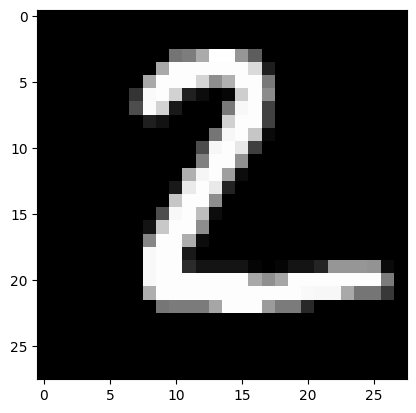

In [ ]:
# Cargamos los datos MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Observamos las dimensiones de los conjunto de train y test
print('x_train shape:', x_train.shape, 'y_train shape:', y_train.shape)


plt.gray()
plt.imshow(x_test[1]);

Como sobre este conjunto no es necesario un preprocesamiento de datos, solamente faltaría normalizarlo. Usaremos como rango $[-0.5, 0.5]$ ya que de esta forma nos aseguramos que las modificaciones que el método de instancias contrafactuales haga a los datos de entrada estarán dentro de límites manejables y predecibles. Esto es crucial para mantener la interpretabilidad y plausibilidad de las instancias contrafactuales generadas.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Especificar los límites mínimos y máximos deseados
xmin, xmax = -.5, .5

# Crear el objeto MinMaxScaler con los límites especificados
scaler = MinMaxScaler(feature_range=(xmin, xmax))

# Unir los conjuntos de datos de entrenamiento y prueba
x_all = np.concatenate((x_train, x_test), axis=0)

# Ajustar el scaler a todos los datos y transformarlos
x_all_scaled = scaler.fit_transform(x_all.reshape(-1, 1)).reshape(x_all.shape)

# Dividir los datos normalizados nuevamente en conjuntos de entrenamiento y prueba
x_train = x_all_scaled[:len(x_train)]
x_test = x_all_scaled[len(x_train):]

In [ ]:
# Añadir una dimensión adicional para indicar el canal de color
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
print('x_train shape:', x_train.shape, 'x_test shape:', x_test.shape)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('y_train shape:', y_train.shape, 'y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28, 1) x_test shape: (10000, 28, 28, 1)
y_train shape: (60000, 10) y_test shape: (10000, 10)


Definimso un modelo CNN sencillo, el cual consta de dos capas convolucionales, seguidas de capas de pooling y dropout, y finalmente dos capas densas, la última con una función de activación softmax para el problema de clasificación multiclase.

In [ ]:
def cnn_model():
    x_in = Input(shape=(28, 28, 1))
    x = Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')(x_in)
    x = MaxPooling2D(pool_size=2)(x)
    x = Dropout(0.3)(x)

    x = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=2)(x)
    x = Dropout(0.3)(x)

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(10, activation='softmax')(x)

    cnn = Model(inputs=x_in, outputs=x_out)
    cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return cnn

In [ ]:
cnn = cnn_model()
cnn.summary()
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=5, verbose=0)
cnn.save('mnist_cnn.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                        

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


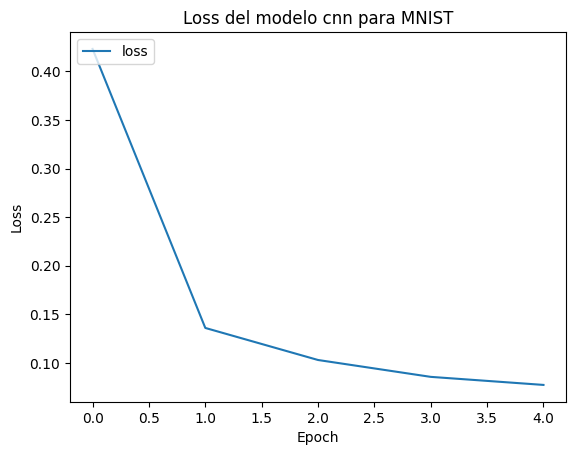

In [ ]:
plt.plot(hist.history['loss'], label='Loss')
plt.title('Loss del modelo cnn para MNIST')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss'], loc='upper left')

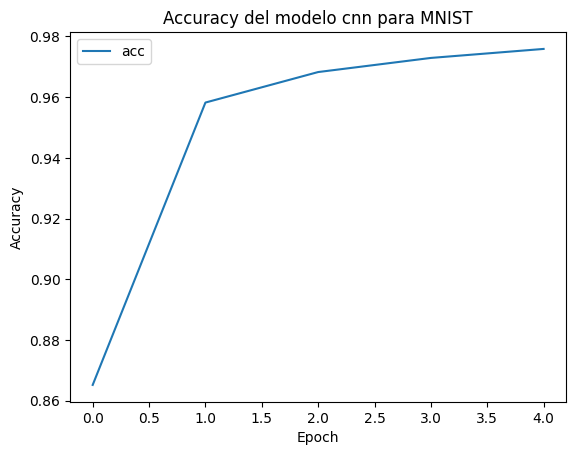

In [ ]:
plt.plot(hist.history['acc'], label='Accuracy')
plt.title('Accuracy del modelo cnn para MNIST')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['acc'], loc='upper left')

Observamos que la precisión (accuracy) del modelo en los datos de prueba es muy alta, aproximadamente 0.98. Esto implica que el modelo clasifica correctamente el 98% de las imágenes de prueba. Cuando generemos instancias contrafactuales, es probable que incluso pequeñas modificaciones en las imágenes originales sean suficientes para cambiar las predicciones del modelo. Dado que el modelo es muy preciso, estas modificaciones mínimas tendrán un alto porcentaje de probabilidades de producir ejemplos que también se clasifiquen correctamente en un 98% de las ocasiones, reflejando la robustez y la capacidad del modelo para generalizar bien a ejemplos ligeramente alterados.


In [ ]:
cnn = load_model('mnist_cnn.h5')
score = cnn.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: ', score[1])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Test accuracy:  0.9889


In [ ]:
posiciones = np.where(np.all(y_test == np.array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), axis=1))[0]
print(posiciones)

[  18   30   32 ... 9975 9986 9996]


Seleccionamos una imagen correspondiente a un dígito 3:

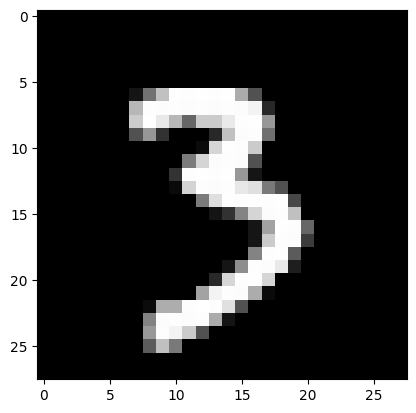

In [ ]:
X = x_test[30].reshape((1,) + x_test[30].shape)
plt.imshow(X.reshape(28, 28));

Inicializaremos el objeto `Counterfactual` utilizando el modelo `cnn` previamente entrenado y otros parámetros necesarios para la configuración del método contrafactual. Los parámetros incluyen `shape` (la forma de los datos de entrada), `target_proba` (la probabilidad objetivo para la clase contrafactual), `tol` (la tolerancia en el ajuste del contrafactual), `target_class` (la clase objetivo deseada para el contrafactual), `max_iter` (el número máximo de iteraciones permitidas para encontrar el contrafactual), `lam_init` (el valor inicial del coeficiente de regularización), `max_lam_steps` (el número máximo de pasos de ajuste para el coeficiente de regularización), `learning_rate_init` (la tasa de aprendizaje inicial), y `feature_range` (el rango de características en el que se deben mantener los datos).

Una vez configurado el objeto `Counterfactual` y se genera una explicación contrafactual para una entrada de datos `X`.


In [ ]:
shape = (1,) + x_train.shape[1:]
print(shape)
target_proba = 1.0
tol = 0.01 # quiere contrafactuales con probabilidad de clase mayor pt>0.99
target_class = 'other' # cualquier clase diferente de la del 3
max_iter = 1000
lam_init = 1e-1
max_lam_steps = 10
learning_rate_init = 0.1 # tasa de aprendizaje
feature_range = (x_train.min(),x_train.max()) #rango de características

(1, 28, 28, 1)


El método `explain` busca encontrar un ejemplo similar a `X` que sea clasificado de manera diferente por la CNN, según los parámetros especificados.


In [ ]:
# initialize explainer
cf = Counterfactual(cnn, shape=shape, target_proba=target_proba, tol=tol,
                    target_class=target_class, max_iter=max_iter, lam_init=lam_init,
                    max_lam_steps=max_lam_steps, learning_rate_init=learning_rate_init,
                    feature_range=feature_range)

start_time = time()
explanation = cf.explain(X)
print('Explanation took {:.3f} sec'.format(time() - start_time))

Explanation took 15.682 sec


Mostramos la clase predicha del contrafactual (`pred_class`) y la probabilidad asociada a esta predicción (`proba`).

La primera imagen muestra el ejemplo contrafactual generado. La clase objetivo para el contrafactual es 9 y la probabilidad objetivo es aproximadamente 0.997. Esto significa que, dado el ejemplo contrafactual resultante, el modelo clasificaría esta imagen como un 9 con una probabilidad del 99.7%.

Counterfactual prediction: 9 with probability 0.9954074025154114


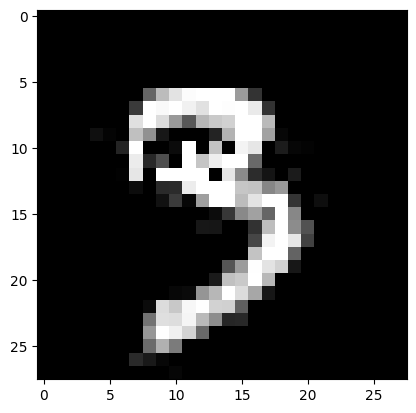

In [ ]:
pred_class = explanation.cf['class']
proba = explanation.cf['proba'][0][pred_class]

print(f'Counterfactual prediction: {pred_class} with probability {proba}')
plt.imshow(explanation.cf['X'].reshape(28, 28));

La segunda imagen muestra la diferencia entre el ejemplo contrafactual y el dato de entrada original `X`. Esto permite visualizar las modificaciones que se hicieron al dato original para cambiar la predicción del modelo.

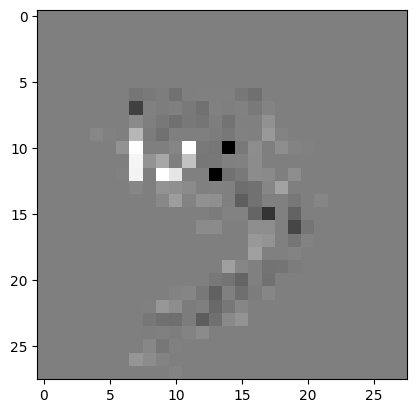

In [ ]:
plt.imshow((explanation.cf['X'] - X).reshape(28, 28));

Este proceso permite entender qué cambios mínimos en los datos de entrada pueden llevar a diferentes predicciones, proporcionando una herramienta poderosa para interpretar y explicar el comportamiento de modelos complejos como las redes neuronales convolucionales.

En las imagenes que se muestran a continuación se observa la evolución del valor contrafactual a lo largo de las iteraciones:

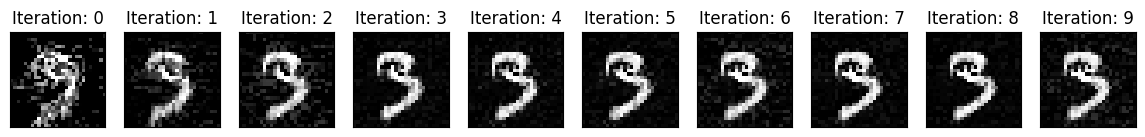

In [ ]:
# para la visualización de los contrafactuales por iteraciones
n_cfs = np.array([len(explanation.all[iter_cf]) for iter_cf in range(max_lam_steps)])
examples = {}
for ix, n in enumerate(n_cfs):
    if n>0:
        examples[ix] = {'ix': ix, 'lambda': explanation.all[ix][0]['lambda'],
                       'X': explanation.all[ix][0]['X']}
columns = len(examples) + 1
rows = 1

fig = plt.figure(figsize=(16,6))

for i, key in enumerate(examples.keys()):
    ax = plt.subplot(rows, columns, i+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(examples[key]['X'].reshape(28,28))
    plt.title(f'Iteration: {key}')

Como en la explicación teórica del método se puso como ejemplo un instancia del dígito 3 y la obtención del valor contrafactual para la clase objetivo 8, haremos otro ejemplo especificando que la target class se efectivamente el 8:

In [ ]:
# ahora estamos comparando la clase 8 con la del 3
target_class = 8

cf = Counterfactual(cnn, shape=shape, target_proba=target_proba, tol=tol,
                    target_class=target_class, max_iter=max_iter, lam_init=lam_init,
                    max_lam_steps=max_lam_steps, learning_rate_init=learning_rate_init,
                    feature_range=feature_range)

explanation = start_time = time()
explanation = cf.explain(X)
print('Explanation took {:.3f} sec'.format(time() - start_time))

Explanation took 8.425 sec


La primera imagen muestra el ejemplo contrafactual generado. La clase objetivo para el contrafactual es 8 y la probabilidad objetivo es aproximadamente 0.998. Esto significa que, dado el ejemplo contrafactual resultante, el modelo clasificaría esta imagen como un 8 con una probabilidad del 99.8%.

Counterfactual prediction: 8 with probability 0.9981605410575867


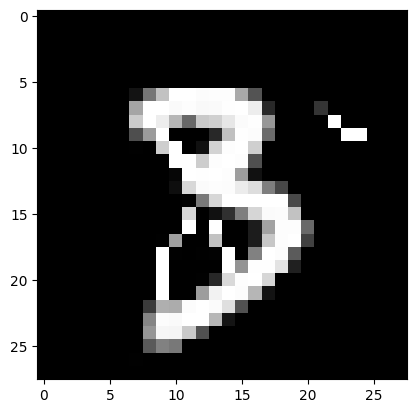

In [ ]:
pred_class = explanation.cf['class']
proba = explanation.cf['proba'][0][pred_class]

print(f'Counterfactual prediction: {pred_class} with probability {proba}')
plt.imshow(explanation.cf['X'].reshape(28, 28));

Dada la imagen de la clase 3, el valor contrafactual resultante lo clasificaría con un 99.9% de probabilidad como un 8.

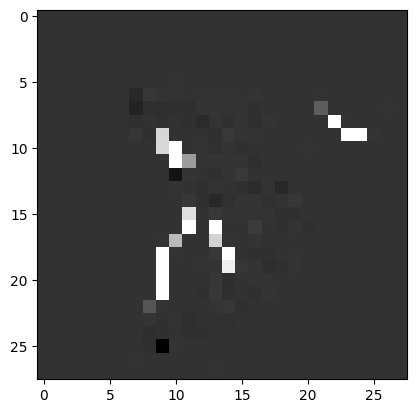

In [ ]:
plt.imshow((explanation.cf['X'] - X).reshape(28, 28));

En esta figura observamos cuales son las diferencias entre el valor contrafactual obtenido y la imagen del 3 original. Es decir, lo que debería diferir la imagen original para que se pasara a clasificar de 3 a 8.

En último lugar, lo que haremos será obtener los contrafactuales para cada categoría, partiendo de la instancia de un dígito de la clase 3.

NOTA: el valor inicial de $\lambda$ hemos tenido que determinarlo muy pequeño ya que tanto para la categoría 0 como 6 presentaba problemas. Eligiendo como valor inicial de $\lambda$ valores mayores a $10^{-10}$ ya podía calcular el valor contrafactual, sin embargo para el resto de categorías el resultado obtenido presentaba muchísimo ruido cosa que no sucedía si se iniciaba en $\lambda=10^{-1}$. Para solucionar este problema se aumentaron tanto el número máximo de pasos de ajuste para el coeficiente de regularización como el número máximo de iteraciones.

In [ ]:
target_proba = 1.0
tol = 0.01 # quiere contrafactuales con probabilidad de clase mayor pt>0.99
target_class = 'other' # cualquier clase diferente de la del 3
max_iter = 3000
lam_init = 1e-10 #se ha bajado el valor de lambda inicial debido a que para la clase 0 y 6 prosentaba problemas pro empezar por un valor demasiado grande
max_lam_steps = 150
learning_rate_init = 0.1 # tasa de aprendizaje
feature_range = (x_train.min(),x_train.max()) #rango de características

In [ ]:
def cf_difclass(target_class):
  cf = Counterfactual(cnn, shape=shape, target_proba=target_proba, tol=tol,
                    target_class=target_class, max_iter=max_iter, lam_init=lam_init,
                    max_lam_steps=max_lam_steps, learning_rate_init=learning_rate_init,
                    feature_range=feature_range)

  explanation = start_time = time()
  explanation = cf.explain(X)
  print('Explanation took {:.3f} sec'.format(time() - start_time))
  return explanation

Explanation took 74.107 sec
0.99999
Explanation took 66.926 sec
0.99999
Explanation took 66.780 sec
0.99999
Explanation took 76.697 sec
0.99999
Explanation took 74.666 sec
0.99999
Explanation took 65.909 sec
0.99999
Explanation took 64.424 sec
0.99032
Explanation took 78.729 sec
0.99999
Explanation took 74.613 sec
0.99999


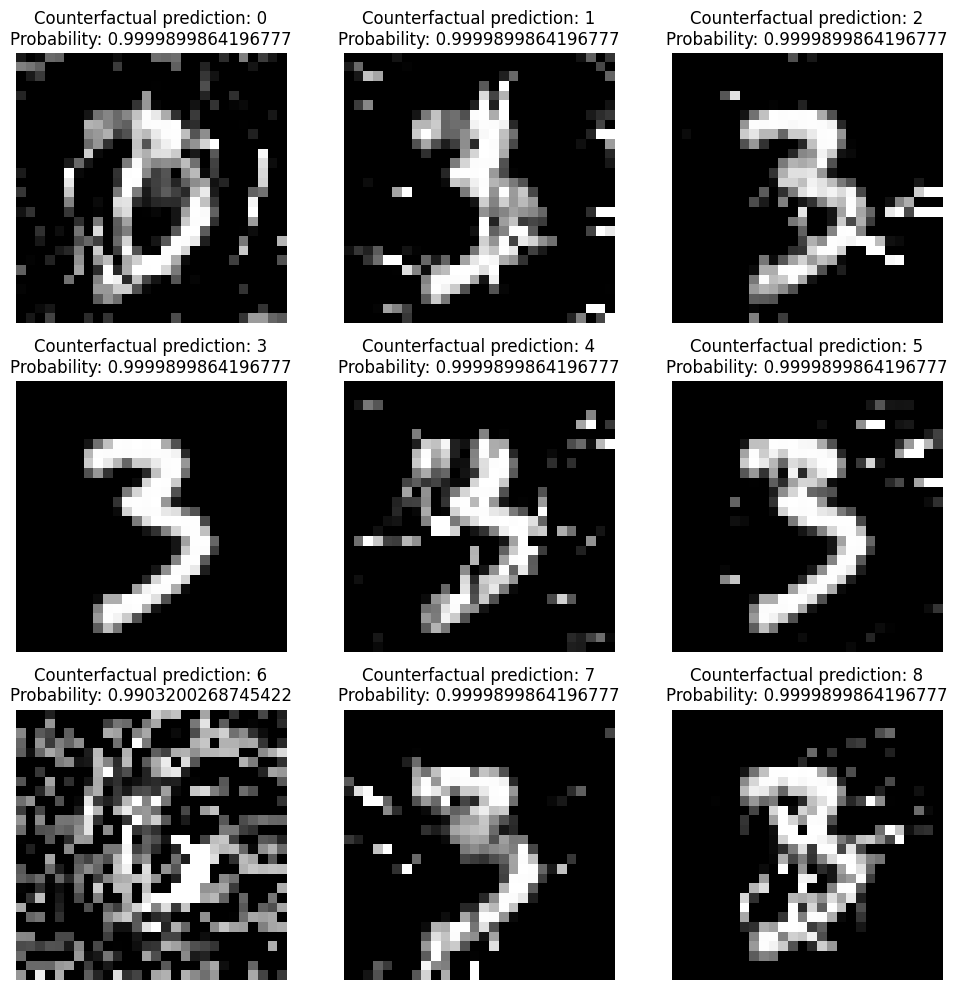

In [ ]:
# ahora estamos comparando el resto de clases con la del 9

fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for t, ax in enumerate(axs.flat):
    explanation = cf_difclass(t)
    pred_class = explanation.cf['class']
    proba = explanation.cf['proba'][0][pred_class]
    ax.imshow(explanation.cf['X'].reshape(28, 28), cmap='gray')
    ax.set_title(f'Counterfactual prediction: {pred_class}\nProbability: {round(proba, 5)}')
    ax.axis('off')

plt.tight_layout()
plt.show()

Analizando las imágenes obtenida, a simple vista parece que la categoría que requeriría mayor cantidad de modificaciones es la del 6, seguida de cerca de la de 0. Para el resto parece que necesita una cantidad similar de modificaciones.

In [ ]:
os.remove('mnist_cnn.h5')

Este ejemplo lo hemos sacado de la documentación de la librería `alibi`. Para comprobar el funcionamiento de este método con un conjunto de datos diferente usaremos el fashionMNIST. Esto se debe a que como tanto este método, **CFI**, como **CEM** y **CFP** funcionan realmente para imágenes en blanco y negro, el conjunto escogido consta de imagenes de diferentes prendas de ropa en blanco y negro. Así su implementación es la siguiente:

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Cargar el conjunto de datos Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Especificar los límites mínimos y máximos deseados
xmin, xmax = -.5, .5

# Crear el objeto MinMaxScaler con los límites especificados
scaler = MinMaxScaler(feature_range=(xmin, xmax))

# Unir los conjuntos de datos de entrenamiento y prueba
x_all = np.concatenate((x_train, x_test), axis=0)

# Ajustar el scaler a todos los datos y transformarlos
x_all_scaled = scaler.fit_transform(x_all.reshape(-1, 1)).reshape(x_all.shape)

# Dividir los datos normalizados nuevamente en conjuntos de entrenamiento y prueba
x_train = x_all_scaled[:len(x_train)]
x_test = x_all_scaled[len(x_train):]

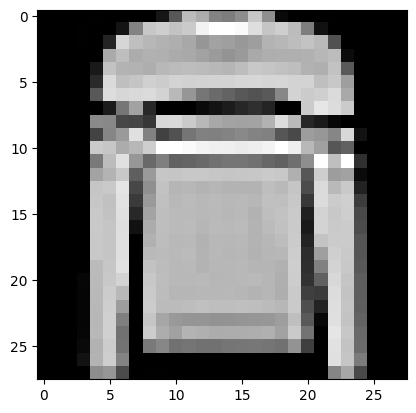

In [ ]:
plt.imshow(x_train[5],cmap='gray')

In [ ]:
# Añadir una dimensión adicional para indicar el canal de color
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
print('x_train shape:', x_train.shape, 'x_test shape:', x_test.shape)

x_train shape: (60000, 28, 28, 1) x_test shape: (10000, 28, 28, 1)


In [ ]:
def cnn_model():
    x_in = Input(shape=(28, 28, 1))
    x = Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')(x_in)
    x = MaxPooling2D(pool_size=2)(x)

    x = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=2)(x)

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x_out = Dense(10, activation='softmax')(x)

    cnn = Model(inputs=x_in, outputs=x_out)
    cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return cnn


In [ ]:
cnn_fashion = cnn_model()
cnn_fashion.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0     

In [ ]:
hist = cnn_fashion.fit(x_train, y_train, batch_size=218, epochs=8, validation_split=0.1,  verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/8
54000/54000 [==============================] - ETA: 0s - loss: 0.5865 - acc: 0.7962

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


54000/54000 [==============================] - 13s 232us/sample - loss: 0.5865 - acc: 0.7962 - val_loss: 0.3770 - val_acc: 0.8615
Epoch 2/8
54000/54000 [==============================] - 4s 73us/sample - loss: 0.3581 - acc: 0.8731 - val_loss: 0.3405 - val_acc: 0.8788
Epoch 3/8
54000/54000 [==============================] - 4s 70us/sample - loss: 0.3153 - acc: 0.8880 - val_loss: 0.3034 - val_acc: 0.8935
Epoch 4/8
54000/54000 [==============================] - 5s 92us/sample - loss: 0.2876 - acc: 0.8968 - val_loss: 0.2802 - val_acc: 0.8988
Epoch 5/8
54000/54000 [==============================] - 3s 46us/sample - loss: 0.2614 - acc: 0.9071 - val_loss: 0.2710 - val_acc: 0.9015
Epoch 6/8
54000/54000 [==============================] - 3s 48us/sample - loss: 0.2475 - acc: 0.9090 - val_loss: 0.2592 - val_acc: 0.9072
Epoch 7/8
54000/54000 [==============================] - 3s 50us/sample - loss: 0.2290 - acc: 0.9172 - val_loss: 0.2582 - val_acc: 0.9062
Epoch 8/8
54000/54000 [===================

In [ ]:
cnn_fashion.save('cnn_fashion.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


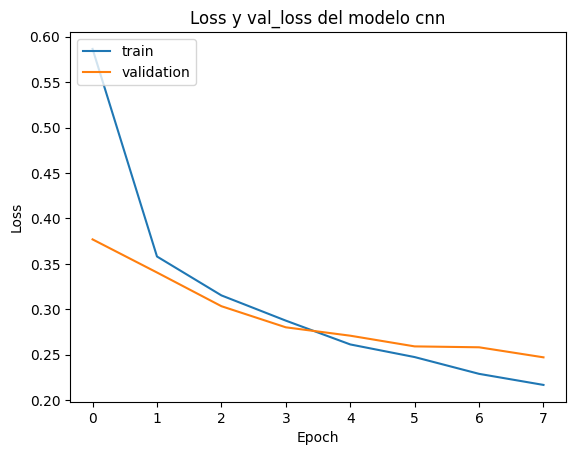

In [ ]:
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='Val_loss')
plt.title('Loss y val_loss del modelo cnn')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper left')

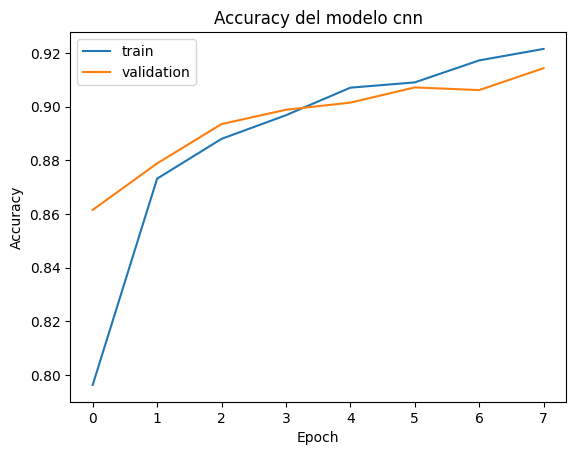

In [ ]:
plt.plot(hist.history['acc'], label='Accuracy')
plt.plot(hist.history['val_acc'], label='Val_accuracy')
plt.title('Accuracy del modelo cnn')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')

In [ ]:
cnn = load_model('cnn_fashion.h5')
score = cnn.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: ', score[1])

Test accuracy:  0.9033


Escogemos como instancia sobre la que calcular contrafactuales la que se observa a continuación. Esta imagen corresponde a un ankle boot que se codifica como la clase 9.

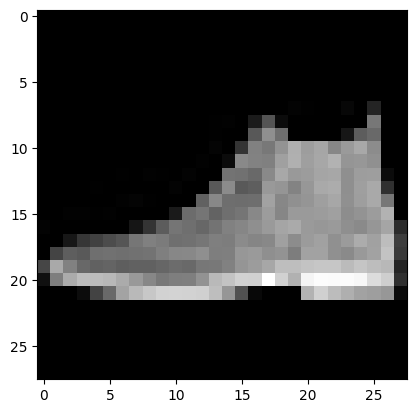

In [ ]:
X = x_test[0].reshape((1,) + x_test[0].shape)
plt.imshow(X.reshape(28, 28), cmap='gray');

Los parámetros de la función `Counterfactual` son los que aparecen bajo. Esta función inicializa el explicador según los parámetros de entrada. Explicaremos que función desempeñan cada uno de estos parámetros y los motivos de esta elección:

1. `shape`: este parámetro define la forma de entrada de las instancias contrafactuales. En este caso, `x_train.shape[1:]` proporciona la forma de las instancias originales de entrenamiento, y `(1,) + x_train.shape[1:]` agrega una dimensión adicional al principio para indicar que se está generando una sola instancia contrafactual.

2. `target_proba`: especifica la probabilidad deseada de que la clase objetivo sea la predicción del modelo en las instancias contrafactuales. En este caso, `target_proba = 1.0` significa que se desea que la probabilidad de la clase objetivo sea igual a 1.0, es decir, se desea una predicción segura de la clase objetivo.

3. `tol`: define la tolerancia para la probabilidad de la clase objetivo. En este caso, `tol = 0.001` significa que se desean contrafactuales con una probabilidad de clase objetivo mayor que 0.99.

4. `target_class`: especifica la clase objetivo a la que se desea que se parezcan las instancias contrafactuales. En este caso, `'other'` significa que se desea que las instancias contrafactuales se parezcan a cualquier clase que no sea la clase 9.

5. `max_iter`: define el número máximo de iteraciones permitidas durante el proceso de optimización para encontrar instancias contrafactuales. En este caso, `max_iter = 50000` significa que se permiten hasta 50000 iteraciones para encontrar una instancia contrafactual.

6. `lam_init`: especifica el valor inicial del parámetro de regularización $\lambda$. En este caso, `lam_init = 1e-1` proporciona un valor inicial para el parámetro de regularización.

7. `max_lam_steps`: define el número máximo de pasos permitidos para ajustar el parámetro de regularización $\lambda$ durante el proceso de optimización. En este caso, `max_lam_steps = 10` significa que se permiten hasta 10 pasos para ajustar $\lambda$2.

8. `learning_rate_init`: especifica la tasa de aprendizaje inicial para el algoritmo de optimización utilizado para encontrar instancias contrafactuales. En este caso, `learning_rate_init = 0.1` proporciona una tasa de aprendizaje inicial de 0.1.

9. `feature_range`: define el rango de características permitido para las instancias contrafactuales. En este caso, `(x_train.min(), x_train.max())` establece el rango de características como el mínimo y máximo de las características en el conjunto de entrenamiento original. Esto garantiza que las características de las instancias contrafactuales estén dentro del mismo rango que las características originales.



In [ ]:
shape = (1,) + x_train.shape[1:]
print(shape)
target_proba = 1.0
tol = 0.001 # want counterfactuals with p(class)>0.99
target_class = 'other' # any class other than 9 will do
max_iter = 50000
lam_init = 1e-1
max_lam_steps = 10
learning_rate_init = 0.1 # tasa de aprendizaje
feature_range = (x_train.min(),x_train.max()) #rango de características

(1, 28, 28, 1)


Una vez inicializado el explicador, `Counterfactual`, se le aplica el método `explain`. El método `explain` toma como entrada la instancia X para la cual se desea generar una explicación. Luego, utiliza el algoritmo implementado en la clase Counterfactual para encontrar una instancia contrafactual que satisfaga ciertas condiciones, como cambios mínimos en las características de X para producir una predicción deseada.

In [ ]:
# initialize explainer
cf = Counterfactual(cnn, shape=shape, target_proba=target_proba, tol=tol,
                    target_class=target_class, max_iter=max_iter, lam_init=lam_init,
                    max_lam_steps=max_lam_steps, learning_rate_init=learning_rate_init,
                    feature_range=feature_range)

start_time = time()
print(y_test[0])
explanation = cf.explain(X)
print('Explanation took {:.3f} sec'.format(time() - start_time))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


9
Explanation took 392.230 sec


Tomaremos el primer valor contrafactual de la lista que los contiene. En este caso, el que hemos elegido clasificaría la imagen resultante como clase 7 (correspondiente con sneakers)con una probabilidad de aproximadamente 0.999. Si se analiza detalladamente la imagen, se observan pequeños cambios con respecto a la original. La aparición de estos cambios son los menores cambios con los cuales pasaría a clasificar la imagen como perteneciente a la clase 7, además con una probabilidad mayor a 0.99 (como hemos indicado como condición de uno de los parámetros).

Counterfactual prediction: 5 with probability 0.9990758895874023


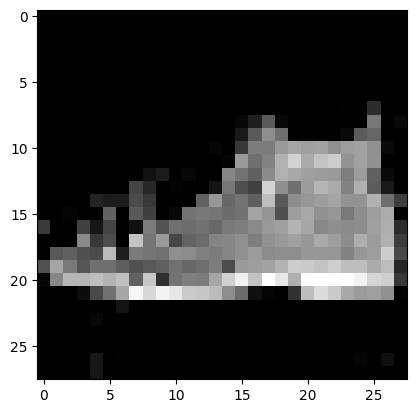

In [ ]:
pred_class = explanation.cf['class']
proba = explanation.cf['proba'][0][pred_class]

print(f'Counterfactual prediction: {pred_class} with probability {proba}')
plt.imshow(explanation.cf['X'].reshape(28, 28), cmap='gray');

En las imagenes que se muestran a continuación se observa la evolución del valor contrafactual a lo largo de las iteraciones:

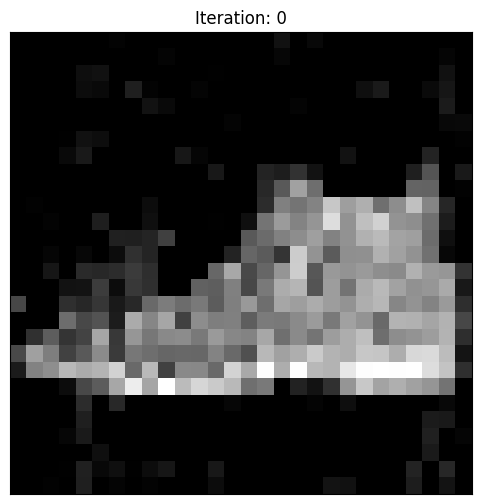

In [ ]:
# para la visualización de los contrafactuales por iteraciones
n_cfs = np.array([len(explanation.all[iter_cf]) for iter_cf in range(max_lam_steps)])
examples = {}
for ix, n in enumerate(n_cfs):
    if n>0:
        examples[ix] = {'ix': ix, 'lambda': explanation.all[ix][0]['lambda'],
                       'X': explanation.all[ix][0]['X']}
columns = len(examples) + 1
rows = 1

fig = plt.figure(figsize=(16,6))

for i, key in enumerate(examples.keys()):
    ax = plt.subplot(rows, columns, i+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(examples[key]['X'].reshape(28,28), cmap='gray')
    plt.title(f'Iteration: {key}')

En la figura resultante solamente se observa el valor contrafactual de la primera y única iteración. Como con esta iteración se ha conseguido cumplir con el requisito de que la probabilidad de clasificarlo como clase 7 sea mayor a 0.99 no ha necesitado seguir realizando iteraciones.

En último lugar, lo que haremos será obtener los contrafactuales para cada categoría, partiendo de la instancia de un ankle boot.

Explanation took 284.145 sec
Explanation took 277.295 sec
Explanation took 242.854 sec
Explanation took 246.421 sec
Explanation took 241.022 sec
Explanation took 242.402 sec
Explanation took 243.353 sec
Explanation took 242.297 sec
Explanation took 242.098 sec


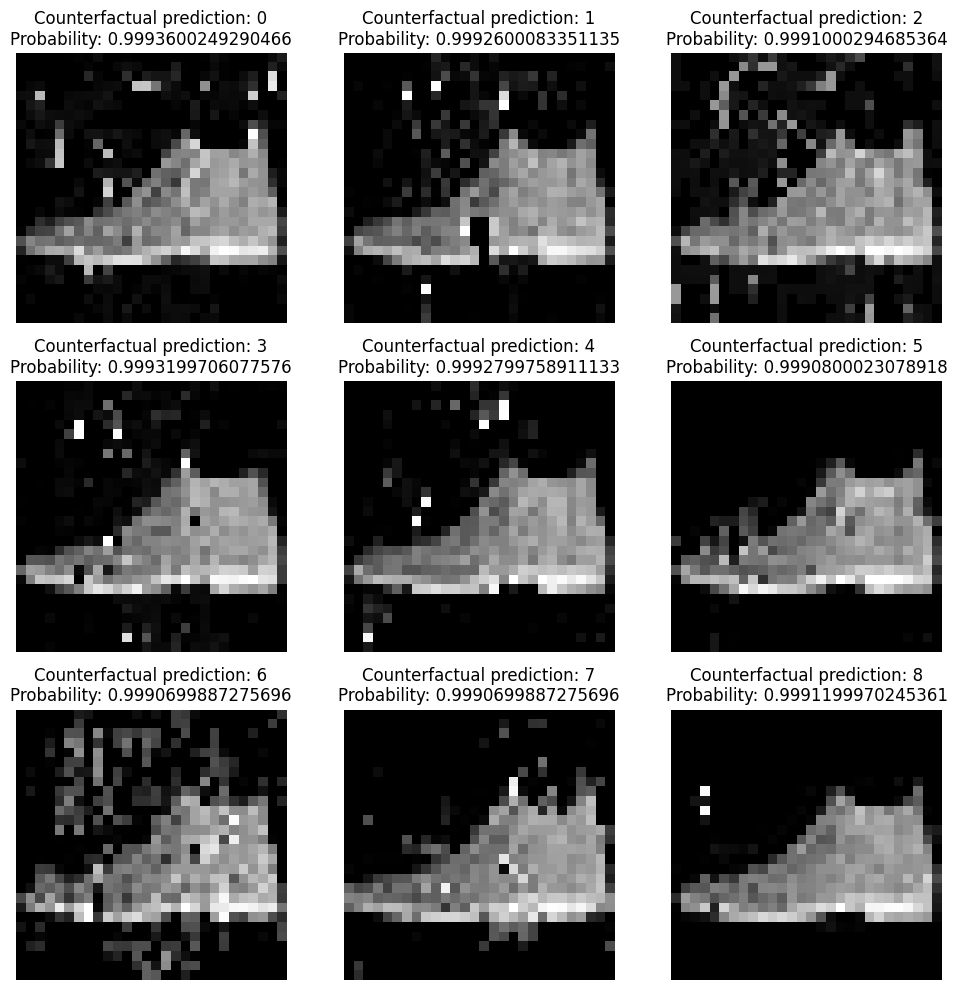

In [ ]:
# ahora estamos comparando el resto de clases con la del 9

fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for t, ax in enumerate(axs.flat):
    explanation = cf_difclass(t)
    pred_class = explanation.cf['class']
    proba = explanation.cf['proba'][0][pred_class]

    ax.imshow(explanation.cf['X'].reshape(28, 28), cmap='gray')
    ax.set_title(f'Counterfactual prediction: {pred_class}\nProbability: {round(proba, 5)}')
    ax.axis('off')

plt.tight_layout()
plt.show()


Explanation took 241.835 sec
Explanation took 252.414 sec
Explanation took 248.167 sec
Explanation took 239.408 sec
Explanation took 242.015 sec
Explanation took 241.629 sec
Explanation took 240.399 sec
Explanation took 237.490 sec
Explanation took 239.762 sec


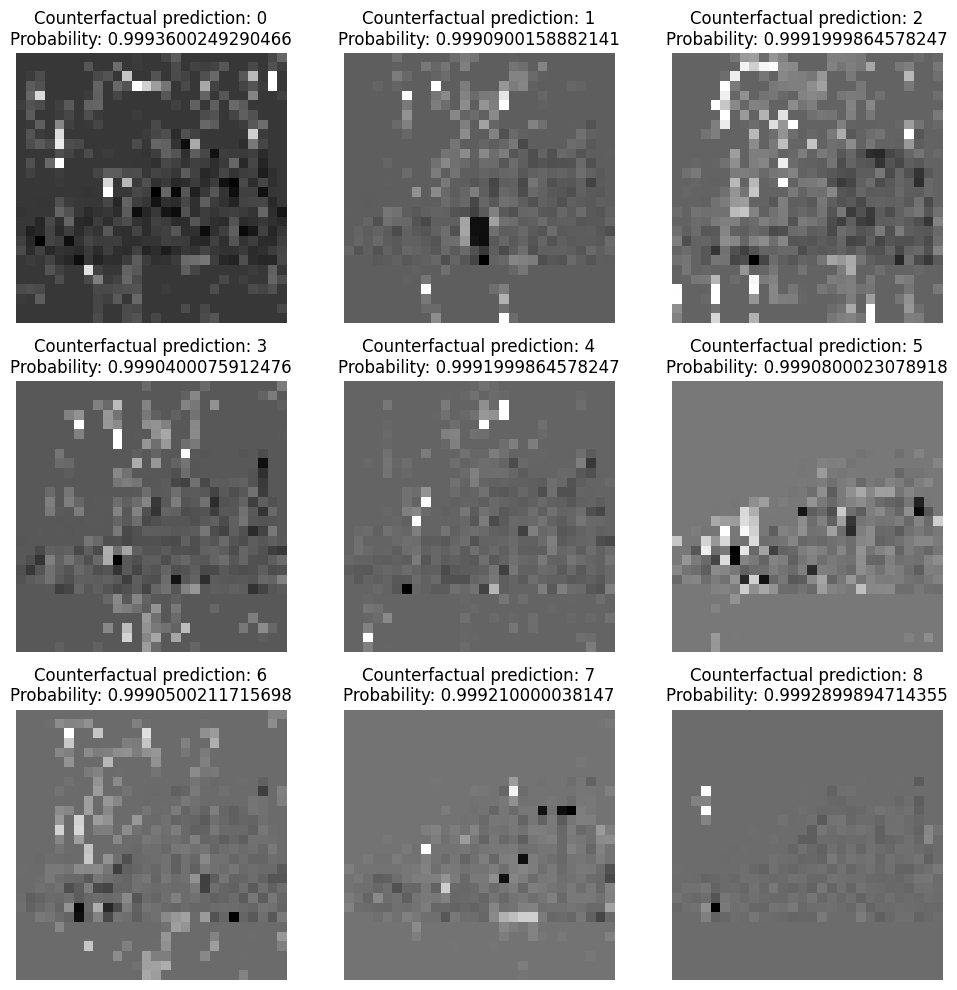

In [ ]:
# ahora estamos comparando el resto de clases con la del 9

fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for t, ax in enumerate(axs.flat):
    explanation = cf_difclass(t)
    pred_class = explanation.cf['class']
    proba = explanation.cf['proba'][0][pred_class]

    ax.imshow((explanation.cf['X'] - X).reshape(28, 28), cmap='gray')
    ax.set_title(f'Counterfactual prediction: {pred_class}\nProbability: {round(proba, 5)}')
    ax.axis('off')

plt.tight_layout()
plt.show()

Analizando las imágenes obtenidas de la diferencia entre el ejemplo contrafactual y el dato de entrada original parece que la categoría que requeriría mayor cantidad de modificaciones es la del 2, seguida de cerca de la de 0. Por otro lado, las clases que parece que necesitan menos modificaciones son la del 5, 7 y 8.

In [ ]:
os.remove('cnn_fashion.h5')

### **Contrastive Explanation Method**

El método CEM genera explicaciones locales basadas en instancias para modelos de clasificación en términos de Positivos Pertinentes (PP) y Negativos Pertinentes (PN). Positivos Pertinentes y Negativos Pertinentes son dos tipos de explicaciones contrastivas que ayudan a entender por qué una instancia se clasifica de una manera específica y qué cambios serían necesarios para cambiar esa clasificación.

* **Positivos Pertinentes (PP)**: el método encuentra las características que deben estar presentes de manera mínima y suficiente (por ejemplo, píxeles importantes en una imagen) para predecir la misma clase que en la instancia original

* **Negativos Pertinentes (PN)**: identifica las características mínimas que, si estuvieran presentes en una instancia, cambiarían el resultado de la clasificación del modelo. El objetivo de identificar los PN no es proporcionar un conjunto completo de características que diferencien todas las instancias posibles, sino encontrar un conjunto mínimo de características cuya presencia sería suficiente para cambiar la clase de predicción a la más cercana diferente. Esto ayuda a entender qué elementos específicos son críticos para que el modelo mantenga su predicción actual y cuáles serían necesarios para cambiarla.

Intuitivamente, los Positivos Pertinentes podrían compararse con Anclas mientras que los Negativos Pertinentes son similares a Contrafactuales.

El término "Contrafactual" ha sido mencionado en varias ocasiones a lo largo de este documento. Sin embargo, al hablar de los Positivos Pertinentes (PP), también ha aparecido el término "Anclas". En el contexto de contrafactuales, las Anclas se refieren a las características o condiciones específicas presentes en una instancia que son fundamentales para la predicción del modelo. Son los elementos que "anclan" la predicción del modelo a ciertos atributos particulares de la instancia. En otras palabras, las Anclas son las características clave que explican por qué el modelo clasifica una instancia en una determinada clase.

En el método CEM (Contrastive Explanation Method), uno de los objetivos es generar PP y PN interpretables, es decir, que sean fácilmente comprensibles y significativos. Para lograr esta combinación de perturbaciones significativas y cercanas a la instancia original, se incorpora un término de regularización en la función objetivo del método CEM. Este término de regularización se formula como una combinación de dos componentes: un término de regularización ($\beta L_1$) y un término de regularización ($L_2$).

* El término $\beta L_1$ penaliza las perturbaciones grandes al imponer una penalización proporcional a la magnitud de los cambios en las características. Esto ayuda a mantener las perturbaciones dispersas y no concentradas en un conjunto reducido de características, lo que favorece la interpretabilidad de las explicaciones.

* El término $L_2$ penaliza las perturbaciones grandes de manera cuadrática, lo que ayuda a mantener las perturbaciones en un rango razonable y cercano a la instancia original.

En resumen, estos términos de regularización tienen como objetivo equilibrar la necesidad de que las perturbaciones sean significativas (para cambiar la clasificación del modelo) con la necesidad de que sean interpretables y realistas. El término $\beta L_1$ fomenta la dispersión de las perturbaciones para resaltar múltiples características relevantes, mientras que el término $L_2$ limita el tamaño de las perturbaciones para evitar cambios demasiado drásticos. Juntos, estos términos ayudan a generar explicaciones contrastivas que son informativas y fáciles de entender.

Opcionalmente, se puede entrenar un autoencoder para reconstruir instancias del conjunto de entrenamiento. Después de generar la instancia perturbada, se pasa esta instancia a través del autoencoder, se calcula el error de reconstrucción (usualmente utilizando la norma $L_2$, que es la suma de los cuadrados de las diferencias) entre la instancia perturbada y su reconstrucción por el autoencoder.

El error de reconstrucción se introduce como un término adicional en la función objetivo o función de pérdida utilizada para encontrar los contrafactuales. El error de reconstrucción mide qué tan bien el autoencoder puede reconstruir la instancia perturbada. Un error bajo indica que la instancia perturbada se parece mucho a las instancias del conjunto de entrenamiento.

Como resultado, las instancias perturbadas encontradas estarán más cerca del conjunto de datos de entrenamiento en términos de su estructura y características. Esto asegura que los contrafactuales sean más realistas y plausibles, ya que no solo son ejemplos que cambian la predicción del modelo, sino que también son similares a las instancias reales que el modelo ha visto durante el entrenamiento.



Consideremos, como para el método anterior, el conjuto de datos MNIST. Sobre estos datos aplicaremos los dos tipos de explicaciones contrastivas PP y PN para ver las diferencias entre ellas y que tipo de información aporta cada una.

In [ ]:
# Cargamos los datos MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Observamos las dimensiones de los conjunto de train y test
print('x_train shape:', x_train.shape, 'y_train shape:', y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Especificar los límites mínimos y máximos deseados
xmin, xmax = -.5, .5

# Crear el objeto MinMaxScaler con los límites especificados
scaler = MinMaxScaler(feature_range=(xmin, xmax))

# Unir los conjuntos de datos de entrenamiento y prueba
x_all = np.concatenate((x_train, x_test), axis=0)

# Ajustar el scaler a todos los datos y transformarlos
x_all_scaled = scaler.fit_transform(x_all.reshape(-1, 1)).reshape(x_all.shape)

# Dividir los datos normalizados nuevamente en conjuntos de entrenamiento y prueba
x_train = x_all_scaled[:len(x_train)]
x_test = x_all_scaled[len(x_train):]

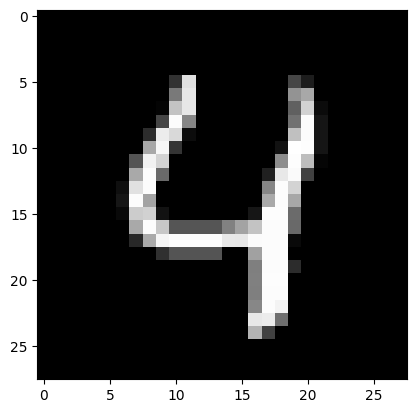

In [ ]:
plt.gray()
plt.imshow(x_test[4]);


Por ejemplo, en la imagen de MNIST del número 4, donde los píxeles están escalados entre 0 y 1, los píxeles con valores cercanos a 1 definen el número en la imagen mientras que los píxeles de fondo tienen valor 0. Suponemos que las perturbaciones hacia el valor de fondo 0 son equivalentes a eliminar características, mientras que las perturbaciones hacia 1 implican agregar características.

In [ ]:
# Añadir una dimensión adicional para indicar el canal de color
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
print('x_train shape:', x_train.shape, 'x_test shape:', x_test.shape)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('y_train shape:', y_train.shape, 'y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28, 1) x_test shape: (10000, 28, 28, 1)
y_train shape: (60000, 10) y_test shape: (10000, 10)


In [ ]:
def cnn_model():
    x_in = Input(shape=(28, 28, 1))
    x = Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')(x_in)
    x = MaxPooling2D(pool_size=2)(x)
    x = Dropout(0.3)(x)

    x = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=2)(x)
    x = Dropout(0.3)(x)

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(10, activation='softmax')(x)

    cnn = Model(inputs=x_in, outputs=x_out)
    cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return cnn

In [ ]:
cnn = cnn_model()
cnn.summary()
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                      

In [ ]:
cnn.save('mnist_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


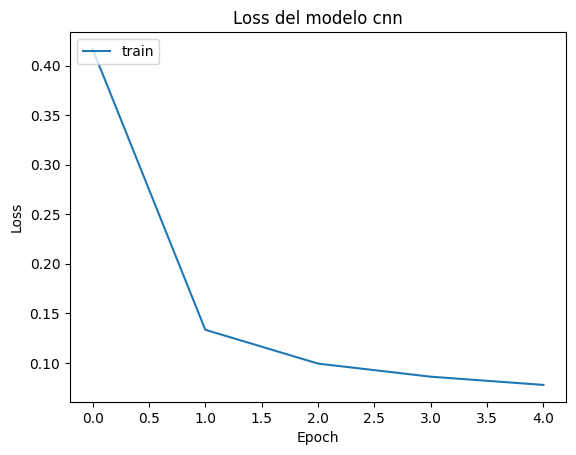

In [ ]:
plt.plot(hist.history['loss'], label='Loss')
plt.title('Loss del modelo cnn')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train'], loc='upper left')

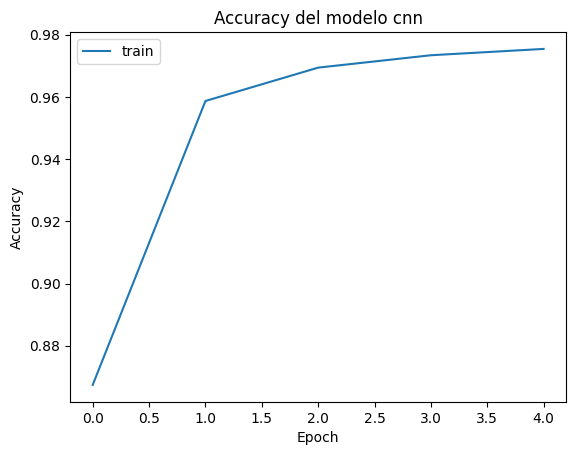

In [ ]:
plt.plot(hist.history['acc'], label='Accuracy')
plt.title('Accuracy del modelo cnn')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train'], loc='upper left')

In [ ]:
cnn = load_model('mnist_cnn.h5')
score = cnn.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: ', score[1])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Test accuracy:  0.9889


A diferencia del método anterior, en este caso es opcional definir y entrenar un autoencoder. El autoencoder puede ser utilizado en el algoritmo CEM (Contrastive Explanation Method) para reconstruir las instancias perturbadas. Aunque su uso es opcional, lo utilizaremos en este ejemplo:

In [ ]:
def ae_model():
    x_in = Input(shape=(28, 28, 1))
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x_in)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    encoded = Conv2D(1, (3, 3), activation=None, padding='same')(x)

    x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    decoded = Conv2D(1, (3, 3), activation=None, padding='same')(x)

    autoencoder = Model(x_in, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder

In [ ]:
ae = ae_model()
ae.summary()
hist = ae.fit(x_train, x_train, batch_size=128, epochs=4, validation_data=(x_test, x_test), verbose=1)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 1)         145       
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 16)        160       
                                                           

In [ ]:
ae.save('mnist_ae.h5', save_format='h5')

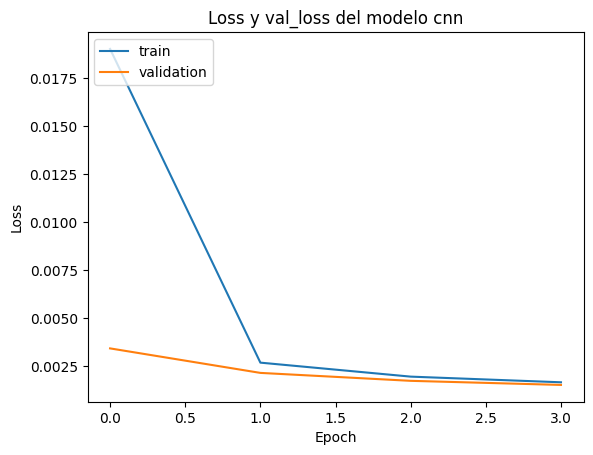

In [ ]:
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='Val_loss')
plt.title('Loss y val_loss del modelo cnn')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper left')

Comparamos las imágenes originales con las decodificadas por el autoencoder:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


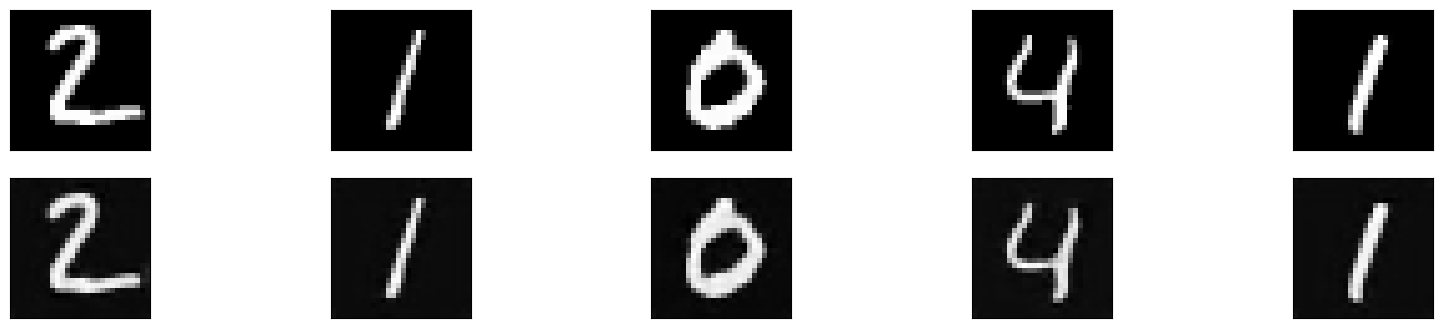

In [ ]:
ae = load_model('mnist_ae.h5')

decoded_imgs = ae.predict(x_test)
n = 5
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

De estos resultados podemos concluir que el autoencoder realiza de forma muy fideldigna la reconstrucción de las imágenes.

Una vez ya están preparados todos los elementos necesarios, el siguiente paso es aplicar el CEM. Se elige una imagen de test sobre la que se buscaran los PP y PN. En primer lugar se generará una explicación contrastiva con negativa pertinente.

### Pertinent Negative

In [ ]:
idx = 15
X = x_test[idx].reshape((1,) + x_test[idx].shape)

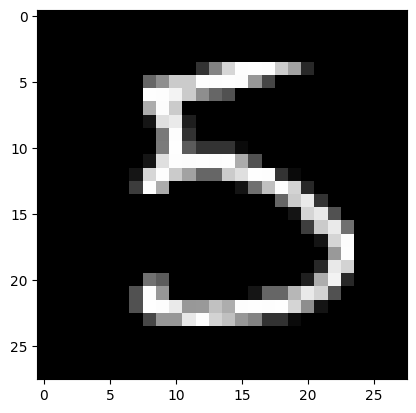

In [ ]:
plt.imshow(X.reshape(28, 28), cmap='gray');

La imagen sobre la que aplicaremos en PN es la que se muestra arriba, que pertenece a la clase del 5.

La expresión `cnn.predict(X)` genera predicciones para el conjunto de datos de entrada X utilizando el modelo de red neuronal convolucional (cnn) que hemos construido anteriormente. Luego, .argmax() se utiliza para encontrar el índice del valor máximo en las predicciones, lo que representa la clase predicha. Por otro lado, .max() se utiliza para obtener el valor máximo de las predicciones, que representa la probabilidad de la clase predicha.

Entonces, cnn.predict(X).argmax() proporciona la clase predicha (como un índice), mientras que cnn.predict(X).max() proporciona la probabilidad de la clase predicha.

Por lo que predice que la imagen resultante pertenece a la clase 5 con una probabilidad de 0.999 aproximadamente.

In [ ]:
cnn.predict(X).argmax(), cnn.predict(X).max()

(5, 0.9998343)

A continuación, definimos los valores de los parámetros de ls función `CEM`. Para entender mejor que aportan y la elección que hemos hecho haremos una breve explicación:

1. **mode**: este parámetro indica el modo de operación de CEM, es decir, si se está generando una explicación para Pertinent Negatives ('PN') o Pertinent Positives ('PP'). En el caso de 'PN', se busca identificar qué características deben estar ausentes de manera mínima y necesaria en la instancia para mantener la predicción original del modelo. En el caso de 'PP', se identifican las características que deben estar presentes de manera mínima y suficiente para mantener la misma predicción que la instancia original.

2. **shape**: este parámetro especifica la forma de la instancia de datos. En este caso, se define como la forma de la instancia original más una dimensión adicional, lo que sugiere que se está trabajando con instancias de datos individuales.

3. **kappa**: es la diferencia mínima requerida entre la probabilidad de predicción para la instancia perturbada en la clase predicha por la instancia original y la probabilidad máxima en las otras clases para que el primer término de pérdida sea minimizado. En otras palabras, controla cuánto se debe cambiar la probabilidad de predicción para la clase original durante el proceso de perturbación.

4. **beta**: es el peso del término de pérdida L1 en la función objetivo. Este término de pérdida se utiliza para mantener las perturbaciones dispersas y cercanas a la instancia original.

5. **gamma**: es el peso del término de pérdida adicional del autoencoder, si se utiliza. Este término de pérdida se agrega opcionalmente para garantizar que las instancias perturbadas estén cerca del conjunto de datos de entrenamiento.

6. **c_init**: es el peso inicial de la pérdida que fomenta predecir una clase diferente ('PN') o la misma clase ('PP') para la instancia perturbada en comparación con la instancia original que se está explicando.

7. **c_steps**: es el número de actualizaciones para el parámetro c, que controla cómo se ajusta el peso de la pérdida durante el proceso de optimización.

8. **max_iterations**: es el número máximo de iteraciones permitidas por valor de c durante el proceso de optimización.

9. **feature_range**: es el rango de características para la instancia perturbada. Este rango se utiliza para limitar las perturbaciones a valores dentro de un rango específico.

10. **clip**: es el rango de valores permitidos para los gradientes durante el proceso de optimización. Ayuda a evitar que los gradientes crezcan demasiado grandes o pequeños.

11. **lr**: es la tasa de aprendizaje inicial para el proceso de optimización.

12. **no_info_val**: es un valor que se considera como que contiene poca o ninguna información para hacer una predicción. Las perturbaciones hacia este valor implican la eliminación de características, mientras que las perturbaciones en la dirección opuesta implican la adición de características.


In [ ]:
mode = 'PN'  # 'PN' (pertinent negative) or 'PP' (pertinent positive)
shape = (1,) + x_train.shape[1:]  # instance shape
kappa = 0.  # minimum difference needed between the prediction probability for the perturbed instance on the
            # class predicted by the original instance and the max probability on the other classes
            # in order for the first loss term to be minimized
beta = .1  # weight of the L1 loss term
gamma = 100  # weight of the optional auto-encoder loss term
c_init = 1.  # initial weight c of the loss term encouraging to predict a different class (PN) or
              # the same class (PP) for the perturbed instance compared to the original instance to be explained
c_steps = 10  # nb of updates for c
max_iterations = 1000  # nb of iterations per value of c
feature_range = (x_train.min(),x_train.max())  # feature range for the perturbed instance
clip = (-1000.,1000.)  # gradient clipping
lr = 1e-2  # initial learning rate
no_info_val = -1. # a value, float or feature-wise, which can be seen as containing no info to make a prediction
                  # perturbations towards this value means removing features, and away means adding features
                  # for our MNIST images, the background (-0.5) is the least informative,
                  # so positive/negative perturbations imply adding/removing features

In [ ]:
# initialize CEM explainer and explain instance
cem = CEM(cnn, mode, shape, kappa=kappa, beta=beta, feature_range=feature_range,
          gamma=gamma, ae_model=ae, max_iterations=max_iterations,
          c_init=c_init, c_steps=c_steps, learning_rate_init=lr, clip=clip, no_info_val=no_info_val)

explanation = cem.explain(X)

El método `explain` devuelve un objeto de tipo Explanation con los siguientes atributos:

- `X`: instancia original
- `X_pred`: clase predicha de la instancia original
- `PN` o `PP`: Negativo Pertinente o Positivo Pertinente
- `PN_pred` o `PP_pred`: clase predicha de PN o PP
- `grads_graph`: valores de gradiente calculados a partir del gráfico de TensorFlow con respecto a las características de entrada en PN o PP
- `grads_num`: valores de gradiente numérico con respecto a las características de entrada en PN o PP

 Por tanto, `explanation.PN_pred` nos proporciona la predicción pertinente negativa, es decir, la clase predicha para el pertinente negativo. En este caso la clase predicha para el pertinente negativo es 3.

 Por otro lado, `explanation.PN` es la imagen pertinente negativa generada por el método CEM. Esta imagen muestra los cambios necesarios en la instancia original para cambiar la predicción del modelo a la clase pertinente negativa. La visualización de `explanation.PN` nos ayuda a comprender qué características o regiones de la imagen original son relevantes para la predicción del modelo.

Pertinent negative prediction: 8


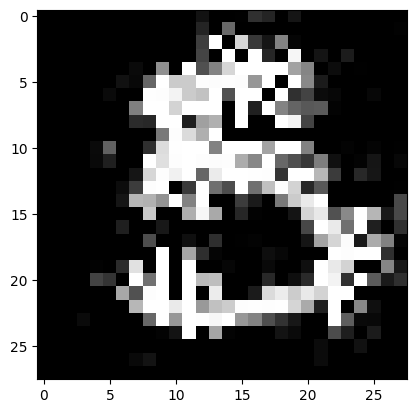

In [ ]:
print(f'Pertinent negative prediction: {explanation.PN_pred}')
plt.imshow(explanation.PN.reshape(28, 28), cmap='gray');

En este caso se ha cambiado un 5 a un 8, esto se consigue cambiando 0's en 1's hasta que se forma el nuevo número. Se han añadido 1's tratando de cerrar las dos aberturas que tiene el 5 para que se asemeje más a un 8.

### Pertinent Positive

In [ ]:
mode = 'PP'

In [ ]:
# initialize CEM explainer and explain instance
cem = CEM(cnn, mode, shape, kappa=kappa, beta=beta, feature_range=feature_range,
          gamma=gamma, ae_model=ae, max_iterations=max_iterations,
          c_init=c_init, c_steps=c_steps, learning_rate_init=lr, clip=clip, no_info_val=no_info_val)

explanation = cem.explain(X)

Recordemos `explanation.PP_pred` nos proporciona la clase predicha para el pertinente positivo. Es decir, nos dice qué clase predijo el modelo para la instancia que ha sido explicada como un pertinente positivo.

Por otro lado, `explanation.PP` contiene la representación del pertinente positivo en forma de imagen. Es la instancia que ha sido identificada como un pertinente positivo, lo que significa que contiene las características mínimas necesarias para mantener la clasificación original.

Pertinent positive prediction: 5


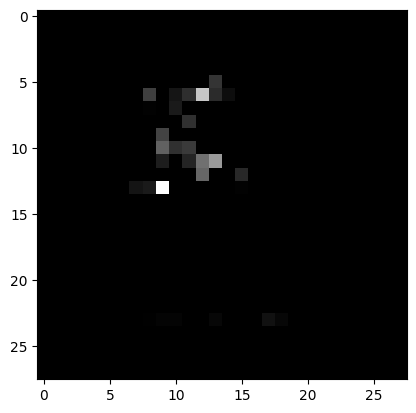

In [ ]:
print(f'Pertinent positive prediction: {explanation.PP_pred}')
plt.imshow(explanation.PP.reshape(28, 28), cmap='gray');

Para encontrar el **PP**, hacemos lo contrario y cambiamos los 1's de la instancia original por 0's, el valor de fondo, y solo mantenemos un contorno vago del 5 original. Observamos que solamente conserva el contorno de la parte superior del 5, lo que corresponde a una C cuadrada ya que seguramente sea la parte más carácterística del número que permita diferenciala del resto.

In [ ]:
os.remove('mnist_cnn.h5')
os.remove('mnist_ae.h5')

Ahora presentaremos otro ejemplo de uso de este método, en este caso con el dataset iris. En primer lugar cargamos y preparamos los datos, normalizándolos para ayudar a su posterior manejo.

In [ ]:
from sklearn.datasets import load_iris

# cargamos los datos
dataset = load_iris()
feature_names = dataset.feature_names
class_names = list(dataset.target_names)

In [ ]:
dataset.data = (dataset.data - dataset.data.mean(axis=0)) / dataset.data.std(axis=0)

Dividimos el conjunto en entrenamiento y test:

In [ ]:
idx = 145
x_train,y_train = dataset.data[:idx,:], dataset.target[:idx]
x_test, y_test = dataset.data[idx+1:,:], dataset.target[idx+1:]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

En este caso el modelo que se usará no será un CNN sino que será un modelo de regresión logística debido a su simplicidad y interpretabilidad. Consta de un única capa densa con función de activación `softmax`, ya que se trata de un problema multiclase con 3 tipos (de ahí que esta capa la formen 3 unidades). También se ha cambiado el tipo de opimizador por el `Stochastic gradient descent`.

In [ ]:
def lr_model():
    x_in = Input(shape=(4,))
    x_out = Dense(3, activation='softmax')(x_in)
    lr = Model(inputs=x_in, outputs=x_out)
    lr.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return lr

In [ ]:
lr = lr_model()
lr.summary()
lr.fit(x_train, y_train, batch_size=16, epochs=500, verbose=1)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_6 (Dense)             (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Train on 145 samples
Epoch 1/500
145/145 [==============================] - 0s 691us/sample - loss: 0.7389 - acc: 0.7034
Epoch 2/500
145/145 [==============================] - 0s 174us/sample - loss: 0.7099 - acc: 0.7172
Epoch 3/500
145/145 [==============================] - 0s 131us/sample - loss: 0.6861 - acc: 0.7379
Epoch 4/500
145/145 [==============================] - 0s 175us/sample - loss: 0.6627 - acc: 0.7517


In [ ]:
lr.save('iris_lr.h5', save_format='h5')

Como bien sus nombres indican, en la primera salida se imprime la clase predicha para la instancia que se va a explicar. Utiliza la función `np.argmax` para encontrar el índice de la clase con la probabilidad más alta y luego lo mapea al nombre de la clase correspondiente utilizando `class_names`. Esto nos proporciona la etiqueta de clase, en este caso virginica, predicha para la instancia que estamos explicando.

En la segunda salide se imprimen las probabilidades de predicción para cada clase en la instancia dada. Utiliza el método `predict` del modelo de regresión logística para obtener las probabilidades de predicción para todas las clases. Notamos que aunque la probabilidad de virginica es la mayor, le sigue de cerca la de versicolor.

In [ ]:
idx = 0
X = x_test[idx].reshape((1,) + x_test[idx].shape)
print(f'Prediction on instance to be explained: {class_names[np.argmax(lr.predict(X))]}')
print(f'Prediction probabilities for each class on the instance: {lr.predict(X)}')

Prediction on instance to be explained: virginica
Prediction probabilities for each class on the instance: [[2.248232e-04 3.030355e-01 6.967396e-01]]


In [ ]:
mode = 'PN'  # 'PN' (pertinent negative) or 'PP' (pertinent positive)
shape = (1,) + x_train.shape[1:]  # instance shape
kappa = .2  # minimum difference needed between the prediction probability for the perturbed instance on the
            # class predicted by the original instance and the max probability on the other classes
            # in order for the first loss term to be minimized
beta = .1  # weight of the L1 loss term
c_init = 10.  # initial weight c of the loss term encouraging to predict a different class (PN) or
              # the same class (PP) for the perturbed instance compared to the original instance to be explained
c_steps = 10  # nb of updates for c
max_iterations = 1000  # nb of iterations per value of c
feature_range = (x_train.min(axis=0).reshape(shape)-.1,  # feature range for the perturbed instance
                 x_train.max(axis=0).reshape(shape)+.1)  # can be either a float or array of shape (1xfeatures)
clip = (-1000.,1000.)  # gradient clipping
lr_init = 1e-2  # initial learning rate

In [ ]:
# define model
lr = load_model('iris_lr.h5')

# initialize CEM explainer and explain instance
cem = CEM(lr, mode, shape, kappa=kappa, beta=beta, feature_range=feature_range,
          max_iterations=max_iterations, c_init=c_init, c_steps=c_steps,
          learning_rate_init=lr_init, clip=clip)
cem.fit(x_train, no_info_type='median')  # we need to define what feature values contain the least
                                         # info wrt predictions
                                         # here we will naively assume that the feature-wise median
                                         # contains no info; domain knowledge helps!
explanation = cem.explain(X, verbose=False)

En la primera salida se imprime la instancia original que se está explicando, la correspondiente a la especie virginica como se imprime en la segunda salida. Es la instancia de datos en su forma original antes de cualquier modificación o perturbación.

In [ ]:
print(f'Original instance: {explanation.X}')
print(f'Predicted class: {class_names[explanation.X_pred]}')

Original instance: [[ 0.55333328 -1.28296331  0.70592084  0.92230284]]
Predicted class: virginica


En este caso la primera salida muestra la pertinente negativa. Es la instancia modificada o perturbada de manera que la predicción del modelo cambie de la clase originalmente predicha a otra clase. Como la segunda salida muestra la clase predicha para la instancia PN, entonces si la instancia original tuviera los valores que se muestran en la primera salida, el modelo `iris_lr` en vez de predecir que es virginica la predeciria como versicolor. Como se observa solo se modificaría el valor de la tercera columna, la correspondiente a petal length. Tiene sentido que la modificación sea mínima ya que cuando se mostraron las probabilidades de pertenencia, los valores que tomaban versicolor y virginica era muy próximos.

In [ ]:
print(f'Pertinent negative: {explanation.PN}')
print(f'Predicted class: {class_names[explanation.PN_pred]}')

Pertinent negative: [[ 0.5533333  -1.2829633  -0.20352232  0.92230284]]
Predicted class: versicolor


In [ ]:
expl = {}
expl['PN'] = explanation.PN
expl['PN_pred'] = explanation.PN_pred

In [ ]:
mode = 'PP'

In [ ]:
# define model
lr = load_model('iris_lr.h5')

# initialize CEM explainer and explain instance
cem = CEM(lr, mode, shape, kappa=kappa, beta=beta, feature_range=feature_range,
          max_iterations=max_iterations, c_init=c_init, c_steps=c_steps,
          learning_rate_init=lr_init, clip=clip)
cem.fit(x_train, no_info_type='median')
explanation = cem.explain(X, verbose=False)

En el caso del dataset iris, el parámetro "Pertinent Positive (PP)" se refiere a una instancia generada de tal manera que, cuando se explique una instancia original, se identifica como una instancia que pertenece a la misma clase que la instancia original. En otras palabras, la instancia "Pertinent Positive" es una instancia que muestra las modificaciones mínimas para asegurar que la predicción del modelo permanezca en la misma clase que la instancia original.

Por tanto, si nuestra instancia original pertenece a la clase virginica, entonces el "Pertinent Positive" que obtenemos son cambios en las características originales que, cuando se aplican, resultarían en la predicción de una determinada clase.

Los valores negativos que vemos en las variables correspondientes al sépalo  indican que la característica original debe ser reducida en esa cantidad para obtener la predicción de la clase deseada. Para las variables correspondientes al pétalo indica lo contrario.

In [ ]:
print(f'Pertinent positive: {explanation.PP}')
print(f'Predicted class: {class_names[explanation.PP_pred]}')

Pertinent positive: [[-7.44469730e-09 -3.47054341e-08  7.14477693e-01  6.33669104e-01]]
Predicted class: virginica


In [ ]:
expl['PP'] = explanation.PP
expl['PP_pred'] = explanation.PP_pred

In [ ]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['species'] = np.array([dataset.target_names[i] for i in dataset.target])

In [ ]:
pn = pd.DataFrame(expl['PN'], columns=dataset.feature_names)
pn['species'] = 'PN_' + class_names[expl['PN_pred']]
pp = pd.DataFrame(expl['PP'], columns=dataset.feature_names)
pp['species'] = 'PP_' + class_names[expl['PP_pred']]
orig_inst = pd.DataFrame(explanation.X, columns=dataset.feature_names)
orig_inst['species'] = 'orig_' + class_names[explanation.X_pred]
df = pd.concat([df, pn, pp, orig_inst], ignore_index=True)

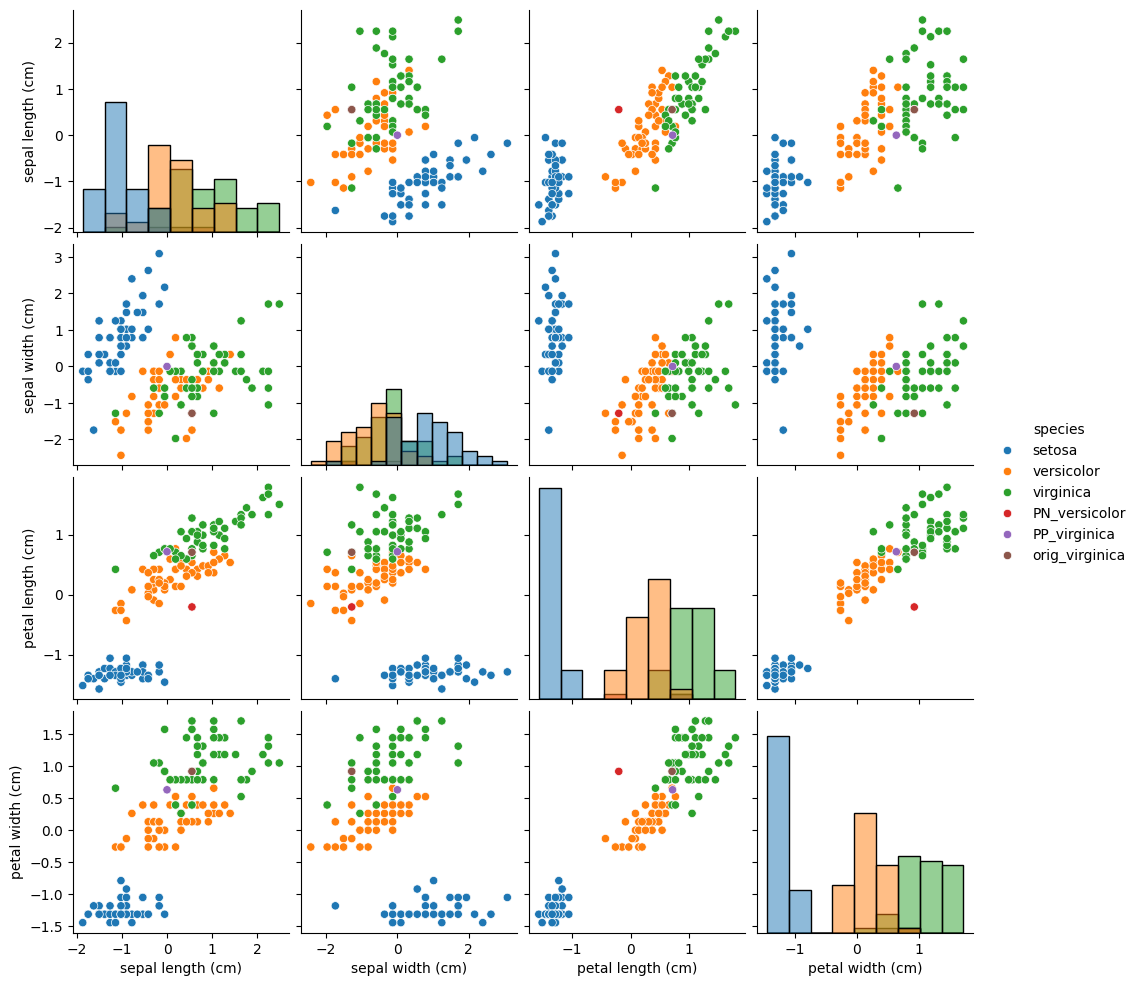

In [ ]:
fig = sns.pairplot(df, hue='species', diag_kind='hist');

La figura muestra un gráfico de dispersión del conjunto de datos Iris, destacando los puntos correspondientes a los Negativos Pertinentes (PN) y Positivos Pertinentes (PP) en una muestra de la clase **virginica**. Cada subgráfico (par de ejes) representa una combinación de dos de características que forman el conjunto de datos: longitud del sépalo, ancho del sépalo, longitud del pétalo, ancho del pétalo.

Cada punto en los subgráficos representa una observación en el conjunto de datos Iris, y los puntos están coloreados según la especie de flor:
- **Azul**: setosa
- **Naranja**: versicolor
- **Verde**: virginica

Además, hay puntos resaltados con colores específicos para representar los Negativos Pertinentes (PN) y los Positivos Pertinentes (PP) para una muestra de la clase virginica:
- **Rojo**: PN para versicolor (PN_versicolor)
- **Morado**: PP para virginica (PP_virginica)
- **Marrón**: Instancia original de virginica (orig_virginica)

### Análisis Específico de los PN y PP
#### Negativos Pertinentes (PN)
Los PN para la muestra virginica están marcados en **rojo**. Los PN indican qué características deben estar ausentes para que la instancia de virginica se mantenga clasificada como virginica y no cambie a versicolor.

- En los subgráficos, los puntos rojos parecen estar ubicados en las áreas donde se ubican mayoritariamente muestras versicolor. En cambio en otras gráficas se encuntra totalmente alejada del resto de puntos.

#### Positivos Pertinentes (PP)
Los PP para la muestra virginica están marcados en **morado**. Los PP indican qué características deben estar presentes para asegurar que la instancia sea clasificada como virginica.

- Los puntos morados tienden a estar en las fronteras entre las zonas densamente pobladas por muestras virginicas y muestras versicolor, situandose en la área de las muestras versicolor.

### Conclusiones
- **PN (Negativos Pertinentes)**: Nos ayudan a entender qué características, si estuvieran presentes, podrían cambiar la clasificación de una muestra de virginica a versicolor. Esto es útil para identificar qué atributos son críticos para evitar la incorrecta clasificación.
- **PP (Positivos Pertinentes)**: Nos muestran qué características mínimas deben estar presentes para asegurar la clasificación correcta como virginica. Estos son los atributos esenciales que definen la clase virginica.